In [2]:
import pandas as pd
APExBio_df = pd.read_csv('L1021-DiscoveryProbe-FDA-approved-Drug-Library_Updated.csv', index_col=0)

In [3]:
from rdkit import Chem
def smiles_check(SMILES_code):
    x = 1
    if Chem.MolFromSmiles(SMILES_code) is None:
        x =0
    return x
APExBio_df.SMILES.apply(smiles_check).sum()
# Cross-chek data!

2321

# Similarity calculation

In [4]:
# https://medium.com/data-professor/how-to-calculate-molecular-similarity-25d543ea7f40

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs

def tanimoto_calc(smi1, smi2):
    mol1 = Chem.MolFromSmiles(smi1)
    mol2 = Chem.MolFromSmiles(smi2)
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 3, nBits=2048)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 3, nBits=2048)
    s = round(DataStructs.TanimotoSimilarity(fp1,fp2),3)
    return s

def tanimoto_calc_arg(mol_of_interest):
    arg_smiles = 'C(CC(C(=O)O)N)CN=C(N)N'
    arg_similarity_score = tanimoto_calc(arg_smiles, mol_of_interest)
    return arg_similarity_score

def tanimoto_calc_NAD(mol_of_interest):
    NAD_smiles = 'C1=CC(=C[N+](=C1)C2C(C(C(O2)COP(=O)(O)OP(=O)(O)OCC3C(C(C(O3)N4C=NC5=C(N=CN=C54)N)O)O)O)O)C(=O)N'
    NAD_similarity_score = tanimoto_calc(NAD_smiles, mol_of_interest)
    return NAD_similarity_score

In [5]:
APExBio_df['Similarity_to_Arg_Tanimoto'] = APExBio_df.SMILES.apply(tanimoto_calc_arg)
APExBio_df['Similarity_to_NAD_Tanimoto'] = APExBio_df.SMILES.apply(tanimoto_calc_NAD)

# Sorted by compounds similar to Arg

In [13]:
def get_top_30_hits():
    APExBio_df['Similarity_to_Arg_Tanimoto'] = APExBio_df.SMILES.apply(tanimoto_calc_arg)
    top_30_list = list(APExBio_df.sort_values(by='Similarity_to_Arg_Tanimoto', ascending=False).head(30)['Item Name'])
    return top_30_list

repeat_dictionary = {x:get_top_30_hits() for x in list(range(1,30))}
repeat_dictionary

{1: ['L-Arginine',
  'L(+)-Ornithine hydrochloride',
  'L-Lysine hydrochloride',
  'H-Cit-OH',
  'DL-Arginine',
  'L-Arginine (hydrochloride)',
  'D-Glutamine',
  'L-Glutamine',
  'H-Cys-OH',
  'L-Cysteine HCl',
  'L-Asparagine',
  'H-D-Ser-OH',
  'H-Ser-OH',
  'DL-Serine',
  'L-Selenomethionine',
  'Methionine',
  'DL-Methionine',
  'L-Methionine',
  'L-Glutamic acid monosodium salt',
  'L-Leucine',
  'L-Theanine',
  'Ibuprofen Lysine',
  'Fudosteine',
  'D-Alanine',
  'L-Alanine',
  'D-Phenylalanine',
  'L-Valine',
  'L-Glutathione Reduced',
  'N-Carbamyl-L-glutamic acid',
  'L-Threonine'],
 2: ['L-Arginine',
  'L(+)-Ornithine hydrochloride',
  'L-Lysine hydrochloride',
  'H-Cit-OH',
  'DL-Arginine',
  'L-Arginine (hydrochloride)',
  'D-Glutamine',
  'L-Glutamine',
  'H-Cys-OH',
  'L-Cysteine HCl',
  'L-Asparagine',
  'H-D-Ser-OH',
  'H-Ser-OH',
  'DL-Serine',
  'L-Selenomethionine',
  'Methionine',
  'DL-Methionine',
  'L-Methionine',
  'L-Glutamic acid monosodium salt',
  'L-Leucin

In [29]:
APExBio_df.sort_values(by='Similarity_to_NAD_Tanimoto', ascending=False).head(30)[['Item Name', 'Similarity_to_NAD_Tanimoto']].to_csv('similar_to_NAD.csv')

In [26]:
APExBio_df.sort_values(by='Similarity_to_Arg_Tanimoto', ascending=False).head(30)[['Item Name', 'Similarity_to_Arg_Tanimoto']].to_csv('similar_to_Arg.csv')

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole


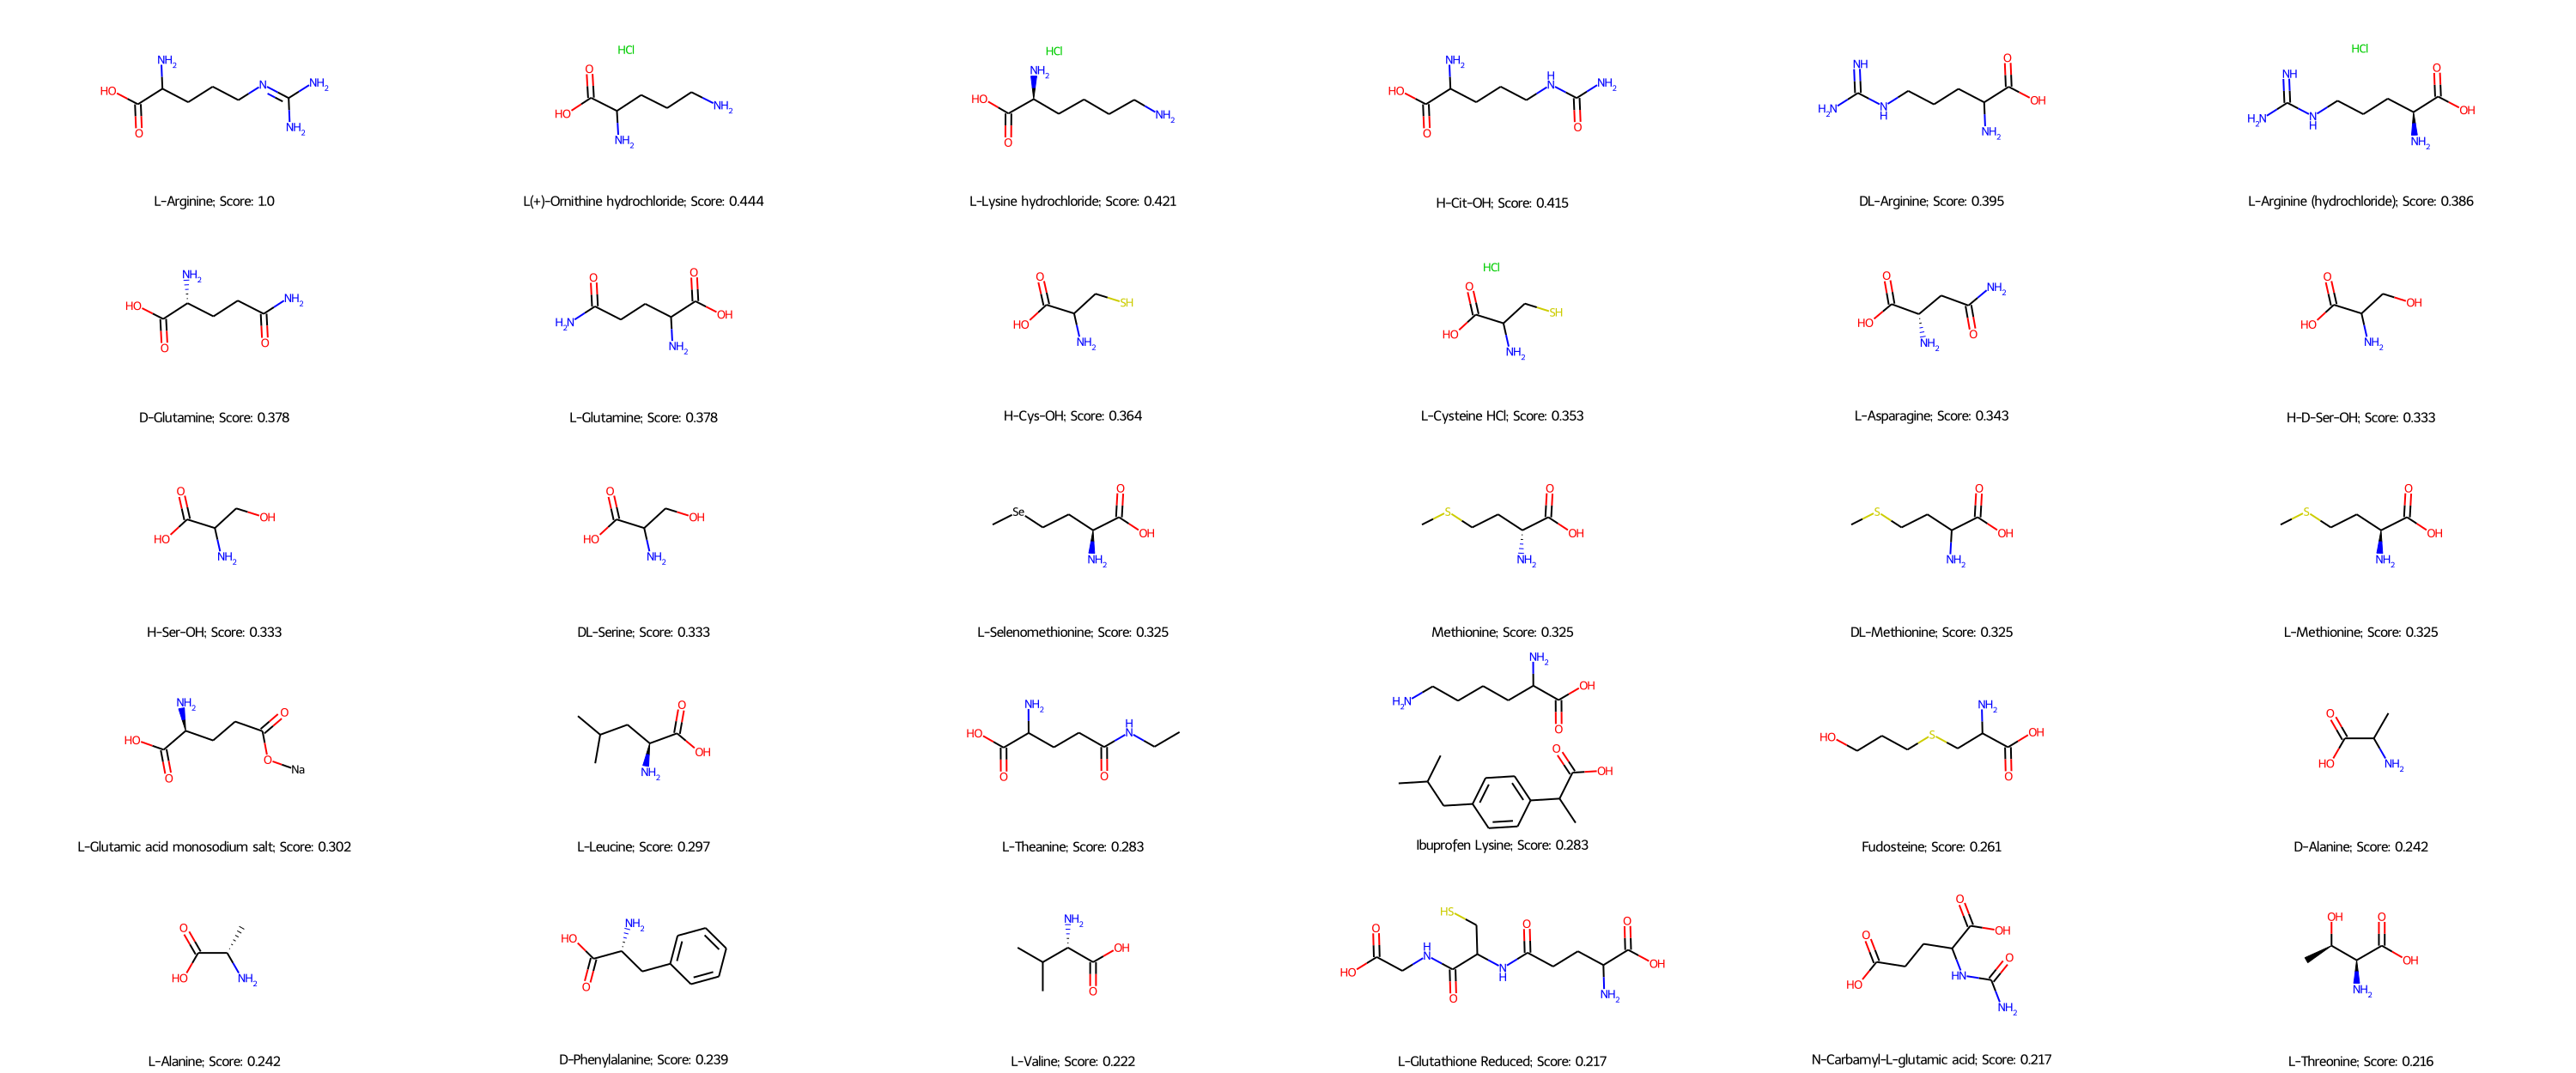

In [43]:
molecules_to_draw_name = list(APExBio_df.sort_values(by='Similarity_to_Arg_Tanimoto', ascending=False).head(30)['Item Name'])
molecules_to_draw_score = list(APExBio_df.sort_values(by='Similarity_to_Arg_Tanimoto', ascending=False).head(30)['Similarity_to_Arg_Tanimoto'])
molecules_to_draw_SMILES = list(APExBio_df.sort_values(by='Similarity_to_Arg_Tanimoto', ascending=False).head(30)['SMILES'])

label_combined = [molecules_to_draw_name[i]+'; Score: '+str(molecules_to_draw_score[i]) for i in range(len(molecules_to_draw_name))]

rMols = [Chem.MolFromSmiles(r) for r in molecules_to_draw_SMILES]
Chem.Draw.MolsToGridImage(rMols, 
                          legends = [label for label in label_combined],
                          subImgSize=(500,250),
                          molsPerRow=6,
                          useSVG=False)


# Sorted by compounds similar to NAD+

In [14]:
APExBio_df.sort_values(by='Similarity_to_NAD_Tanimoto', ascending=False).head(30)

,CatalogNumber,Item Name,CAS Number,Plate Location,Rack Number,M.w.,Solvent,Formula,SMILES,Solubility,Form,Pathway,Target,Information,URL,SMILES_check,Similarity_to_Arg_Tanimoto,Similarity_to_NAD_Tanimoto
1040,B1793,NAD+,53-84-9,G08,L1021-12,663.43,DMSO,C21H27N7O14P2,C1=CC(=C[N+](=C1)C2C(C(C(O2)COP(=O)([O-])OP(=O...,≥28.55 mg/mL in H2O; insoluble in EtOH; ≥26.05...,NaN,Others,Others,NaN,https://www.apexbt.com/search.php?catalog=B1793,1,0.055,0.872
1668,B7876,Adenosine 5-triphosphate,34369-07-8,H10,L1021-19,507.18,H2O,C10H16N5O13P3,NC1=C(N=CN2[C@@]3([H])[C@@](O)([H])[C@@](O)([H...,≥50.7 mg/mL in H2O; insoluble in EtOH; insolub...,NaN,Others,Others,Purinergic P2 receptor agonist,https://www.apexbt.com/search.php?catalog=B7876,0,0.052,0.635
2056,C6931,ATP,56-65-5,D02,L1021-24,507.18,H2O,C10H16N5O13P3,O[C@H]1[C@@H](O)[C@@H](O[C@@H]1COP(O)(OP(OP(O)...,Insoluble in DMSO; insoluble in EtOH; ≥38 mg/m...,NaN,Immunology & Inflammation,Immunology & Inflammation related,endogenous signalling molecules; important sub...,https://www.apexbt.com/search.php?catalog=C6931,1,0.052,0.635
1432,B3304,ATP disodium salt,987-65-5,C05,L1021-17,551.14,H2O,C10H14N5Na2O13P3,C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)OP(...,insoluble in DMSO; ≥19 mg/mL in H2O; insoluble...,NaN,Others,Others,NaN,https://www.apexbt.com/search.php?catalog=B3304,1,0.052,0.629
1781,C4341,Adenosine-5'-diphosphate,58-64-0,C02,L1021-21,427.2,DMSO,C10H15N5O10P2,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...,≥21.35 mg/mL in DMSO with gentle warming; inso...,NaN,Metabolism,Others,"central component of energy storage, metabolis...",https://www.apexbt.com/search.php?catalog=C4341,0,0.054,0.621
1896,C6376,Adenosine 5'-monophosphate monohydrate,18422-05-4,E07,L1021-22,365.24,DMSO,C10H16N5O8P,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)O)O...,insoluble in H2O; insoluble in EtOH; ≥6.28 mg/...,NaN,NaN,NaN,NaN,https://www.apexbt.com/search.php?catalog=C6376,0,0.057,0.563
1106,B1877,Adenosine,58-61-7,E08,L1021-13,267.24,DMSO,C10H13N5O4,C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)CO)O)O,insoluble in EtOH; insoluble in H2O; ≥12.75 mg...,Free Base,DNA Damage/DNA Repair,Nucleoside Antimetabolite/Analogue,nucleoside,https://www.apexbt.com/search.php?catalog=B1877,1,0.052,0.442
1265,B2062,Vidarabine,5536-17-4,D02,L1021-15,267.24,DMSO,C10H13N5O4,C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)CO)O)O,insoluble in H2O; insoluble in EtOH; ≥12.35 mg...,Free Base,Microbiology & Virology,HSV,antiviral drug for herpes viruses,https://www.apexbt.com/search.php?catalog=B2062,1,0.052,0.442
1897,C6377,Vidarabine monohydrate,24356-66-9,E08,L1021-22,285.26,DMSO,C10H15N5O5,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)CO)O)O)N.O,insoluble in H2O; insoluble in EtOH; ≥49.4 mg/...,NaN,NaN,NaN,NaN,https://www.apexbt.com/search.php?catalog=C6377,0,0.051,0.438
481,A8317,Fludarabine Phosphate (Fludara),75607-67-9,D09,L1021-06,365.21,DMSO,C10H13FN5O7P,C1=NC2=C(N1C3C(C(C(O3)COP(=O)(O)O)O)O)N=C(N=C2N)F,insoluble in EtOH; ≥17.6 mg/mL in DMSO; ≥6.7 m...,Phosphate,DNA Damage/DNA Repair,DNA Synthesis,Inhibits STAT1 activation and DNA synthesis,https://www.apexbt.com/search.php?catalog=A8317,1,0.056,0.381


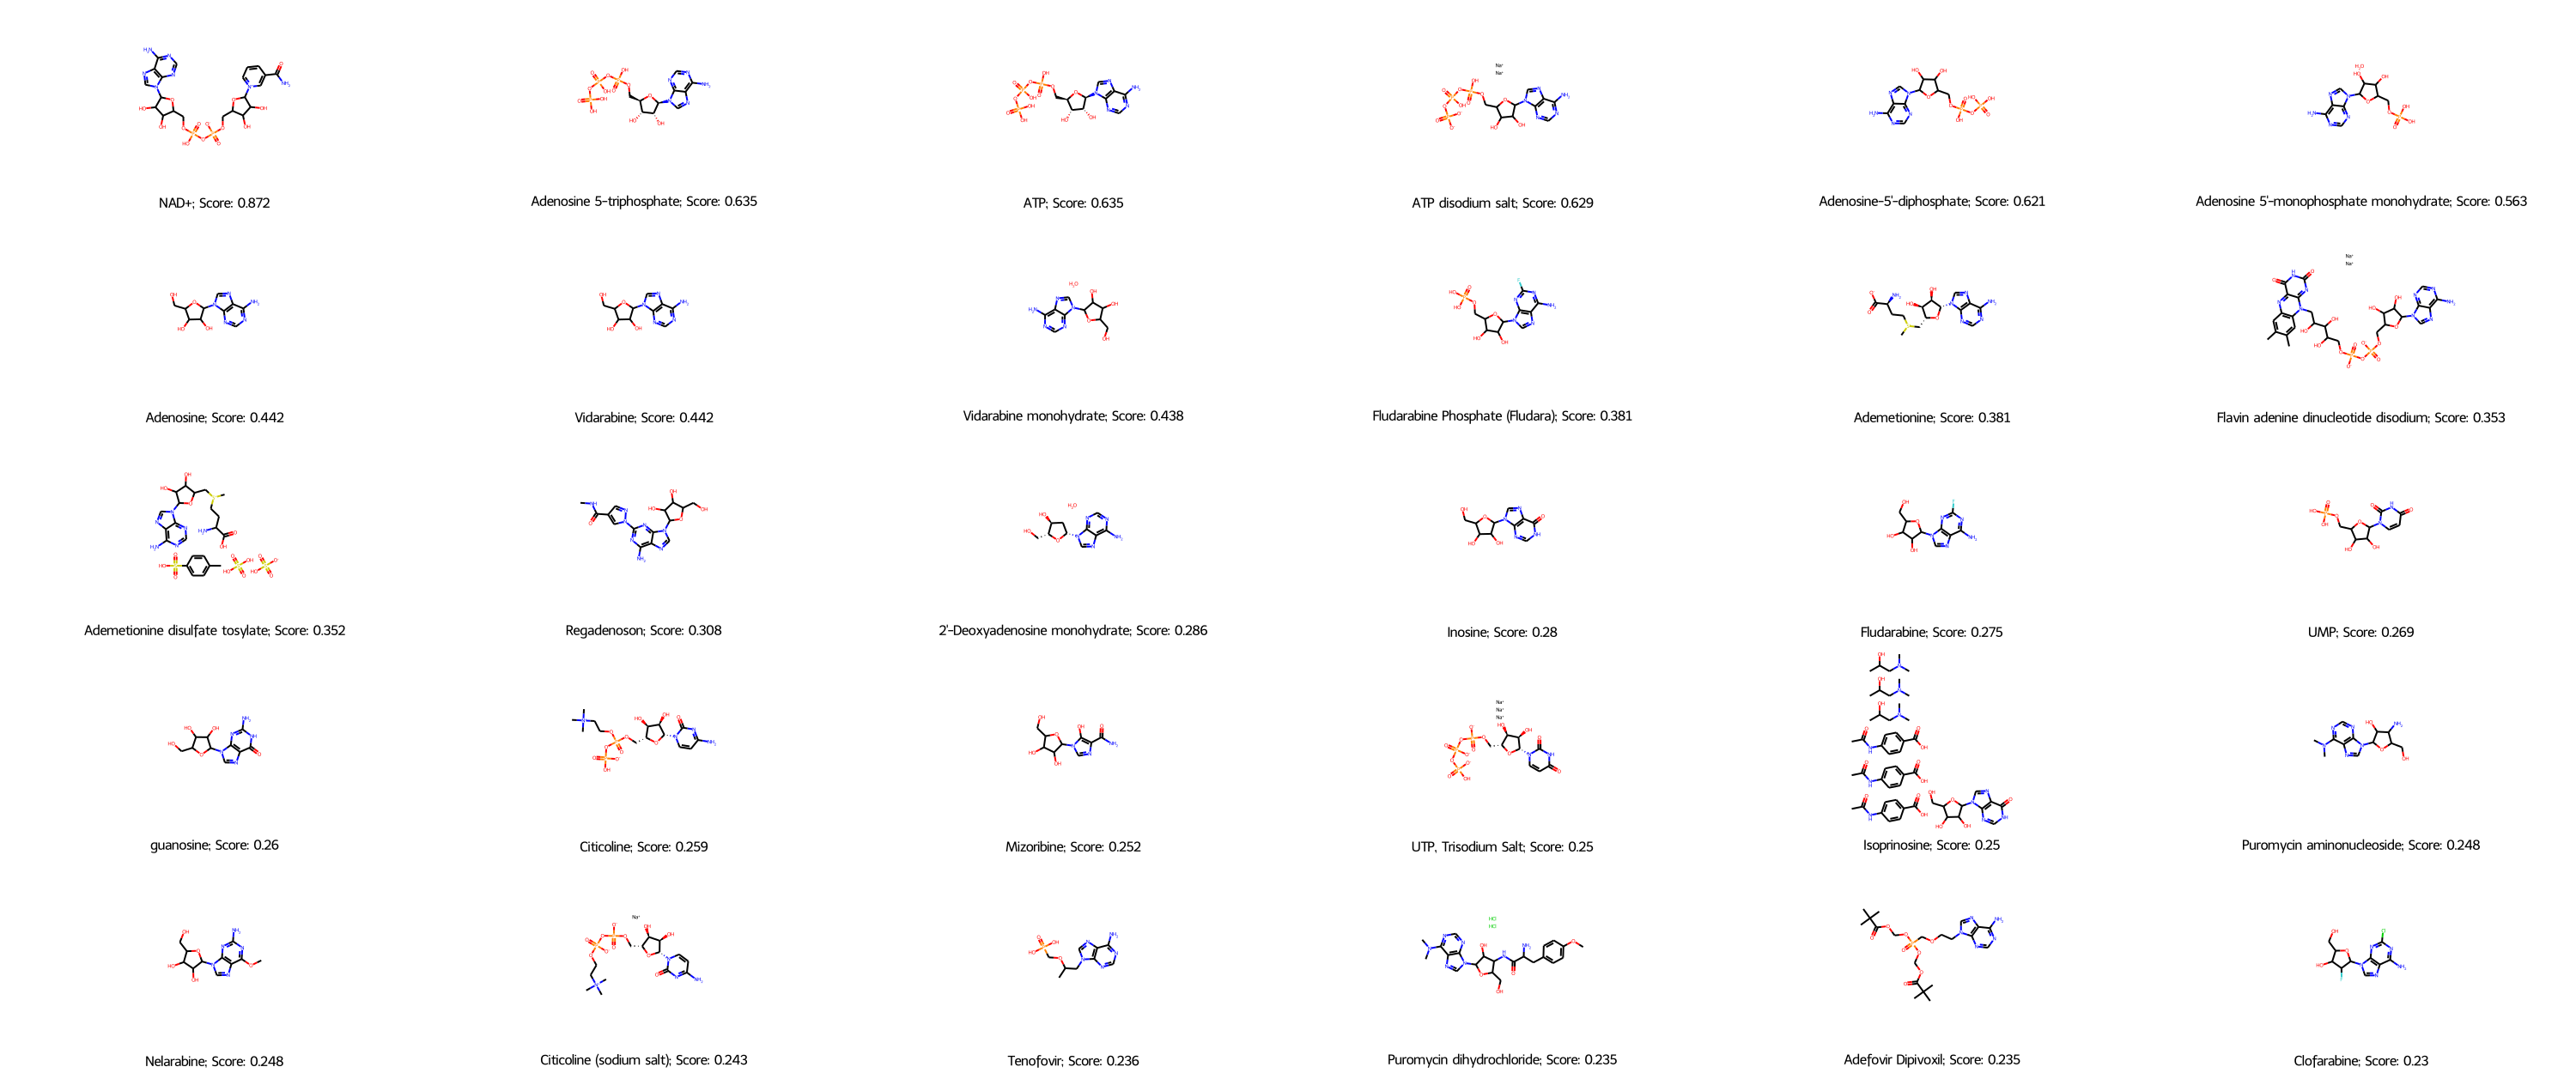

In [45]:
molecules_to_draw_name = list(APExBio_df.sort_values(by='Similarity_to_NAD_Tanimoto', ascending=False).head(30)['Item Name'])
molecules_to_draw_score = list(APExBio_df.sort_values(by='Similarity_to_NAD_Tanimoto', ascending=False).head(30)['Similarity_to_NAD_Tanimoto'])
molecules_to_draw_SMILES = list(APExBio_df.sort_values(by='Similarity_to_NAD_Tanimoto', ascending=False).head(30)['SMILES'])

label_combined = [molecules_to_draw_name[i]+'; Score: '+str(molecules_to_draw_score[i]) for i in range(len(molecules_to_draw_name))]

rMols = [Chem.MolFromSmiles(r) for r in molecules_to_draw_SMILES]
Chem.Draw.MolsToGridImage(rMols, 
                          legends = [label for label in label_combined],
                          subImgSize=(500,250),
                          molsPerRow=6,
                          useSVG=False)

In [18]:
APExBio_df.Similarity_to_Arg_Tanimoto.plot.kde()

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs

def tanimoto_calc(smi1, smi2):
    mol1 = Chem.MolFromSmiles(smi1)
    mol2 = Chem.MolFromSmiles(smi2)
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 3, nBits=2048)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 3, nBits=2048)
    s = round(DataStructs.TanimotoSimilarity(fp1,fp2),3)
    return s

# def tanimoto_calc_query(query_molecule, mol_of_interest):
#     arg_smiles = 'C(CC(C(=O)O)N)CN=C(N)N'
#     arg_similarity_score = tanimoto_calc(arg_smiles, mol_of_interest)
#     return arg_similarity_score

In [4]:
query_molecule = 'CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O)O)C' # SMILES for Ampicilin 

APExBio_df['Tanimoto_score_query'] = APExBio_df['SMILES'].apply(lambda x: tanimoto_calc(x,query_molecule))

In [9]:
APExBio_df.sort_values(by='Tanimoto_score_query', ascending=False)[['Item Name', 'Tanimoto_score_query']]

,Item Name,Tanimoto_score_query
929,Ampicillin Trihydrate,0.983
81,Ampicillin,0.779
928,Amoxicillin,0.776
1440,Amoxicillin trihydrate,0.765
1901,Sultamicillin,0.570
...,...,...
1961,Manganese chloride,0.000
1222,Potassium Iodide,0.000
483,Cisplatin,0.000
382,Cesium chloride,0.000
